# Analyzing  the Trend in Carbon Emissions 



The goal of this project is to thoroughly investigate and understand the current state of carbon emissions across the globe. By utilizing various data analysis techniques such as exploratory data analysis, correlation analysis, and time-series forecasting, the project aims to reveal patterns, trends, and connections between carbon emissions, GDP and population.Specifically , the project will carry out the following:
- Explaoratory analyis on emission trends at global, regional and  country level
- Correlation Analysis to determine the relationship between  carbon emissions and other factors such as GDP and Population
- Time series analysis  to forecast the  global emission  levels for the next five years

The datasets used for these analyis have been obtained from 'Our World in Data (OWID)' at https://ourworldindata.org/ and  will cover  the period from the year  1750 to the year 2021 with a focus on data from the 1900s to 2021. 

## 1. Importing the required libraries and setting up the notebook

For this project will mainly use the pandas library for dataframe manipulations, numpy for numerical computing , matplotlib, seaborn and folium for visualization and statsmodel and Prophet for  timeseries analysis and forecasting .

In [2]:
import pandas as pd

import numpy as np

#Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Statistical modeling
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Forecasting
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

import os

import warnings
warnings.filterwarnings('ignore')

In [44]:
#Setting up
sns.set_style("darkgrid")
sns.set_context("poster", font_scale = .5, rc={"grid.linewidth": 0.6,  'text.color': 'black', 'axes.facecolor': 'white'})
                

## 2. Loading,Cleaning and Transformin the datasets.

For this project we are going to use four main datasets:
- Annual C02 emissions by regions
- Carbon emissions intensitiy vs gdp_per capita
- National GDP Data
- Countries and Continent Data 
All these can be found within  the OWID website

In [5]:
#Changing  the directory to the folder with files
os.chdir('C:/Users/ELITEBOOK COI5/Desktop/Michael Work/Coding & Programming/Emissions Data')

In [13]:
#loading all our datasets
emissions_data=pd.read_csv('annual-co-emissions-by-region.csv')
per_capita_data=pd.read_csv('carbon-emission-intensity-vs-gdp-per-capita.csv')
GDP_data=pd.read_csv('national-gdp.csv')
continents_data=pd.read_csv('continents.csv')

Once we have loaded the required data were going to perform a series merge operations in order to obtain the dataframe that we use for the proceeding Analyis

In [14]:
#Checking emissions data
print(emissions_data.shape)


(73168, 4)


In [21]:
emissions_data.head()

,Entity,Code,Year,Annual CO₂ emissions (zero filled),Population (historical estimates)
0,Afghanistan,AFG,1750,0.0,2802568.0
1,Afghanistan,AFG,1751,0.0,NaN
2,Afghanistan,AFG,1752,0.0,NaN
3,Afghanistan,AFG,1753,0.0,NaN
4,Afghanistan,AFG,1754,0.0,NaN


In [16]:
#checking per capita data 
per_capita_data.head()

,Entity,Code,Year,CO2 emissions (kg per 2017 PPP $ of GDP),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,0.040907,1189.784668,21000258.0,NaN
2,Afghanistan,AFG,2003,0.046130,1235.810059,22645136.0,NaN
3,Afghanistan,AFG,2004,0.038074,1200.277954,23553554.0,NaN
4,Afghanistan,AFG,2005,0.049679,1286.793701,24411196.0,NaN


In [17]:
#Selecting only the needed data
per_capita_data=per_capita_data[['Entity', 'Year', 'Population (historical estimates)']] # We will calculate our own per capita estimates



In [18]:
per_capita_data.head()

,Entity,Year,Population (historical estimates)
0,Abkhazia,2015,NaN
1,Afghanistan,2002,21000258.0
2,Afghanistan,2003,22645136.0
3,Afghanistan,2004,23553554.0
4,Afghanistan,2005,24411196.0


In [19]:
#Merging the two datasets
emissions_data=emissions_data.merge(per_capita_data, on=(['Entity','Year']), how='left')



In [20]:
emissions_data.shape

(73168, 5)

In [22]:
emissions_data.tail()

,Entity,Code,Year,Annual CO₂ emissions (zero filled),Population (historical estimates)
73163,Zimbabwe,ZWE,2017,9596071.0,14751101.0
73164,Zimbabwe,ZWE,2018,11795478.0,15052191.0
73165,Zimbabwe,ZWE,2019,11114607.0,15354606.0
73166,Zimbabwe,ZWE,2020,10607897.0,15669663.0
73167,Zimbabwe,ZWE,2021,11296114.0,15993525.0


In [23]:
#Checking GDP data
GDP_data.head()

,Entity,Code,Year,"GDP (output, multiple price benchmarks)"
0,Albania,ALB,1970,6697491500
1,Albania,ALB,1971,6958496300
2,Albania,ALB,1972,7246038000
3,Albania,ALB,1973,7536605700
4,Albania,ALB,1974,7855124000


In [24]:
#Selecting the required data
GDP_data=GDP_data[['Entity', 'Year', 'GDP (output, multiple price benchmarks)']]
GDP_data.head()

,Entity,Year,"GDP (output, multiple price benchmarks)"
0,Albania,1970,6697491500
1,Albania,1971,6958496300
2,Albania,1972,7246038000
3,Albania,1973,7536605700
4,Albania,1974,7855124000


In [28]:
#Merging with emissions data
emissions_data=emissions_data.merge(GDP_data, on=(['Entity','Year']), how='left')

emissions_data.head()

,Entity,Code,Year,Annual CO₂ emissions (zero filled),Population (historical estimates),"GDP (output, multiple price benchmarks)"
0,Afghanistan,AFG,1750,0.0,2802568.0,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN


In [29]:
#Continents data
continents_data.head()


,Entity,Code,Year,Continent
0,Abkhazia,OWID_ABK,2015,Asia
1,Afghanistan,AFG,2015,Asia
2,Akrotiri and Dhekelia,OWID_AKD,2015,Asia
3,Albania,ALB,2015,Europe
4,Algeria,DZA,2015,Africa


In [31]:
continent_data=continents_data[['Entity','Continent']]

In [32]:
#merging with emissions_data
emissions_data=emissions_data.merge(continent_data, on=(['Entity']), how='left')
emissions_data.head()

,Entity,Code,Year,Annual CO₂ emissions (zero filled),Population (historical estimates),"GDP (output, multiple price benchmarks)",Continent
0,Afghanistan,AFG,1750,0.0,2802568.0,NaN,Asia
1,Afghanistan,AFG,1751,0.0,NaN,NaN,Asia
2,Afghanistan,AFG,1752,0.0,NaN,NaN,Asia
3,Afghanistan,AFG,1753,0.0,NaN,NaN,Asia
4,Afghanistan,AFG,1754,0.0,NaN,NaN,Asia


Now that we have merged the required_data we will proceed to :
- Rename some of the  columns for easier manipulation and;
- Add a few columns more columns. For now we will add the GDP per capita and emissions per capita

In [33]:
#Rename columns
emissions_data.rename(columns={'Annual CO₂ emissions (zero filled)':'Annual emissions',
                               'Population (historical estimates)':'Population',
                                'GDP (output, multiple price benchmarks)':'GDP'}, inplace=True)
emissions_data.head()

,Entity,Code,Year,Annual emissions,Population,GDP,Continent
0,Afghanistan,AFG,1750,0.0,2802568.0,NaN,Asia
1,Afghanistan,AFG,1751,0.0,NaN,NaN,Asia
2,Afghanistan,AFG,1752,0.0,NaN,NaN,Asia
3,Afghanistan,AFG,1753,0.0,NaN,NaN,Asia
4,Afghanistan,AFG,1754,0.0,NaN,NaN,Asia


In [34]:
#Add per capita columns
emissions_data['Emissions_per_capita']=emissions_data['Annual emissions']/emissions_data['Population']
emissions_data['GDP_per_capita']=emissions_data['GDP']/emissions_data['Population']

emissions_data.head()

,Entity,Code,Year,Annual emissions,Population,GDP,Continent,Emissions_per_capita,GDP_per_capita
0,Afghanistan,AFG,1750,0.0,2802568.0,NaN,Asia,0.0,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,Asia,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,Asia,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,Asia,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,Asia,NaN,NaN


In [35]:
emissions_data.tail()

,Entity,Code,Year,Annual emissions,Population,GDP,Continent,Emissions_per_capita,GDP_per_capita
73163,Zimbabwe,ZWE,2017,9596071.0,14751101.0,4.431674e+10,Africa,0.650533,3004.300493
73164,Zimbabwe,ZWE,2018,11795478.0,15052191.0,4.342090e+10,Africa,0.783639,2884.689478
73165,Zimbabwe,ZWE,2019,11114607.0,15354606.0,4.082657e+10,Africa,0.723861,2658.913553
73166,Zimbabwe,ZWE,2020,10607897.0,15669663.0,NaN,Africa,0.676970,NaN
73167,Zimbabwe,ZWE,2021,11296114.0,15993525.0,NaN,Africa,0.706293,NaN


For now we have the dataframe that we need any more additions and transformations  will be carried out as the analysis proceeds

## 2. Exploratory Data Analysis
In this section we are going to analyze trends in terms of emission at global, regional and  national level

### 2.1. Global CO2 emission trends

In [39]:
##Global annual emissions
global_emissions=emissions_data[emissions_data['Entity']=='World']
global_emissions.head()

,Entity,Code,Year,Annual emissions,Population,GDP,Continent,Emissions_per_capita,GDP_per_capita
72080,World,OWID_WRL,1750,9350528.0,745664504.0,NaN,NaN,0.01254,NaN
72081,World,OWID_WRL,1751,9350528.0,NaN,NaN,NaN,NaN,NaN
72082,World,OWID_WRL,1752,9354192.0,NaN,NaN,NaN,NaN,NaN
72083,World,OWID_WRL,1753,9354192.0,NaN,NaN,NaN,NaN,NaN
72084,World,OWID_WRL,1754,9357856.0,NaN,NaN,NaN,NaN,NaN


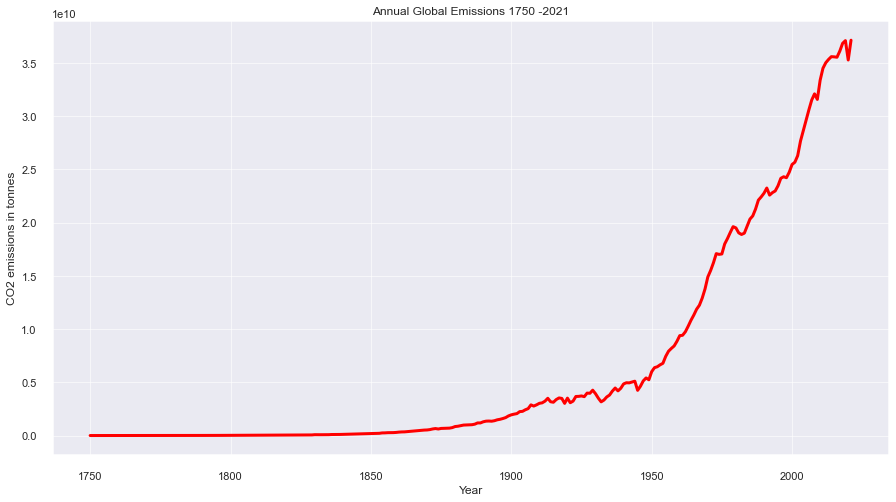

In [45]:
#Plotting annual emissions  trend
plt.figure(figsize=(15,8))
ax=sns.lineplot(data=global_emissions, x='Year', y='Annual emissions', color='red' )
ax.set(xlabel='Year', ylabel='CO2 emissions in tonnes',title='Annual Global Emissions 1750 -2021')
plt.show()

In [46]:
#plotting  changes in emissions from 1900s
#Addinf the annual changes columns
global_emissions['Annual_Changes']=global_emissions['Annual emissions'].diff()
global_emissions.head()

,Entity,Code,Year,Annual emissions,Population,GDP,Continent,Emissions_per_capita,GDP_per_capita,Annual_Changes
72080,World,OWID_WRL,1750,9350528.0,745664504.0,NaN,NaN,0.01254,NaN,NaN
72081,World,OWID_WRL,1751,9350528.0,NaN,NaN,NaN,NaN,NaN,0.0
72082,World,OWID_WRL,1752,9354192.0,NaN,NaN,NaN,NaN,NaN,3664.0
72083,World,OWID_WRL,1753,9354192.0,NaN,NaN,NaN,NaN,NaN,0.0
72084,World,OWID_WRL,1754,9357856.0,NaN,NaN,NaN,NaN,NaN,3664.0


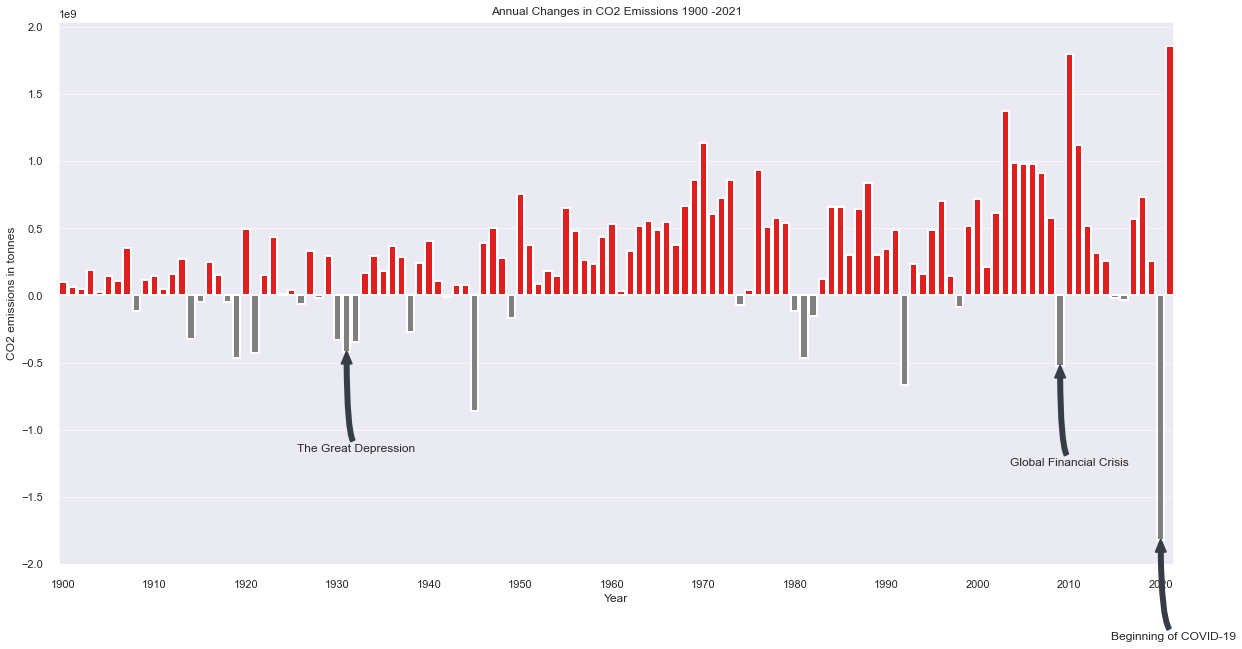

In [55]:
#plotting the data
plt.figure(figsize=(20,10))
cols = ['gray' if x < 0 else 'red' for x in global_emissions[global_emissions['Year']>=1900].Annual_Changes ]
ax=sns.barplot(data=global_emissions[global_emissions['Year']>=1900], x='Year', y='Annual_Changes', palette=cols)
ax.set(xlabel='Year', ylabel='CO2 emissions in tonnes',title='Annual Changes in CO2 Emissions 1900 -2021')

# Adjust the label position
for i, label in enumerate(ax.get_xticklabels()):
    if i % 10 !=0:
        label.set_visible(False)
        
#Annotating specific points on the chart

y_value1=global_emissions[global_emissions['Year']==2020]['Annual_Changes']

ax.annotate('Beginning of COVID-19',
            xy=(2020-1900, y_value1),
            xycoords='data',
            xytext=(-50,-100),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='#363d46', connectionstyle="angle3,angleA=0,angleB=-90"),
            fontsize=12)

y_value2=global_emissions[global_emissions['Year']==2009]['Annual_Changes']
ax.annotate('Global Financial Crisis',
            xy=(2009-1900, y_value2),
            xycoords='data',
            xytext=(-50,-100),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='#363d46', connectionstyle="angle3,angleA=0,angleB=-90"),
            fontsize=12)

y_value3=global_emissions[global_emissions['Year']==1931]['Annual_Changes']
ax.annotate('The Great Depression',
            xy=(1931-1900, y_value3),
            xycoords='data',
            xytext=(-50,-100),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='#363d46', connectionstyle="angle3,angleA=0,angleB=-90"),
            fontsize=12)
    
plt.show()


- The global trend in CO2 emissions since 1900 to 2021 has been one of steady increase. In the early 20th century, CO2 emissions were relatively low, but they began to rise rapidly after World War II as a result of increased industrialization and urbanization. The trend continued throughout the 20th century and into the 21st century, driven by rising energy consumption and a growing global population.

- However, there have been some specific drops in emissions during this period as well. One of the most notable drops in emissions occurred during the global financial crisis in 2008-2009, when many economies around the world contracted and industrial production slowed down. As a result, CO2 emissions decreased for a few years.

- Another notable drop in emissions was observed in 2020 due to the impact of the COVID-19 pandemic. As a result of lockdowns and other measures taken to curb the spread of the virus, many sectors of the economy were temporarily shut down, leading to a decrease in energy consumption and CO2 emissions.However, as the world slowly recovers from the pandemic and economies start to recover, the emissions started to rise again. It's important to note that the drops in emissions during these periods were only temporary and the overall trend of increasing emissions continued.

### 2.2. Regional Trends

In [65]:
#Extracting the list of continents
continents=list(emissions_data['Continent'].dropna().unique())
print(continents)

['Asia', 'Europe', 'Africa', 'Oceania', 'North America', 'Antarctica', 'South America']


In [66]:
continent_data=emissions_data[emissions_data['Entity'].isin(continents)]
continent_data.head()


,Entity,Code,Year,Annual emissions,Population,GDP,Continent,Emissions_per_capita,GDP_per_capita
272,Africa,NaN,1750,0.0,76278087.0,NaN,NaN,0.0,NaN
273,Africa,NaN,1751,0.0,NaN,NaN,NaN,NaN,NaN
274,Africa,NaN,1752,0.0,NaN,NaN,NaN,NaN,NaN
275,Africa,NaN,1753,0.0,NaN,NaN,NaN,NaN,NaN
276,Africa,NaN,1754,0.0,NaN,NaN,NaN,NaN,NaN


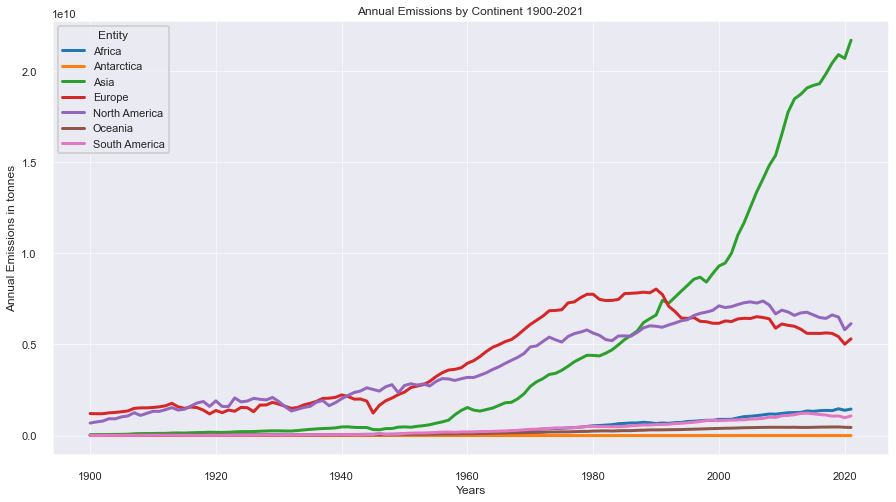

In [70]:
#plotting emissions by continents
plt.figure(figsize=(15,8))
ax=sns.lineplot(data=continent_data[continent_data['Year']>=1900], x='Year', y='Annual emissions',hue='Entity')
ax.set(xlabel='Years', ylabel='Annual Emissions in tonnes', title='Annual Emissions by Continent 1900-2021')
plt.show()

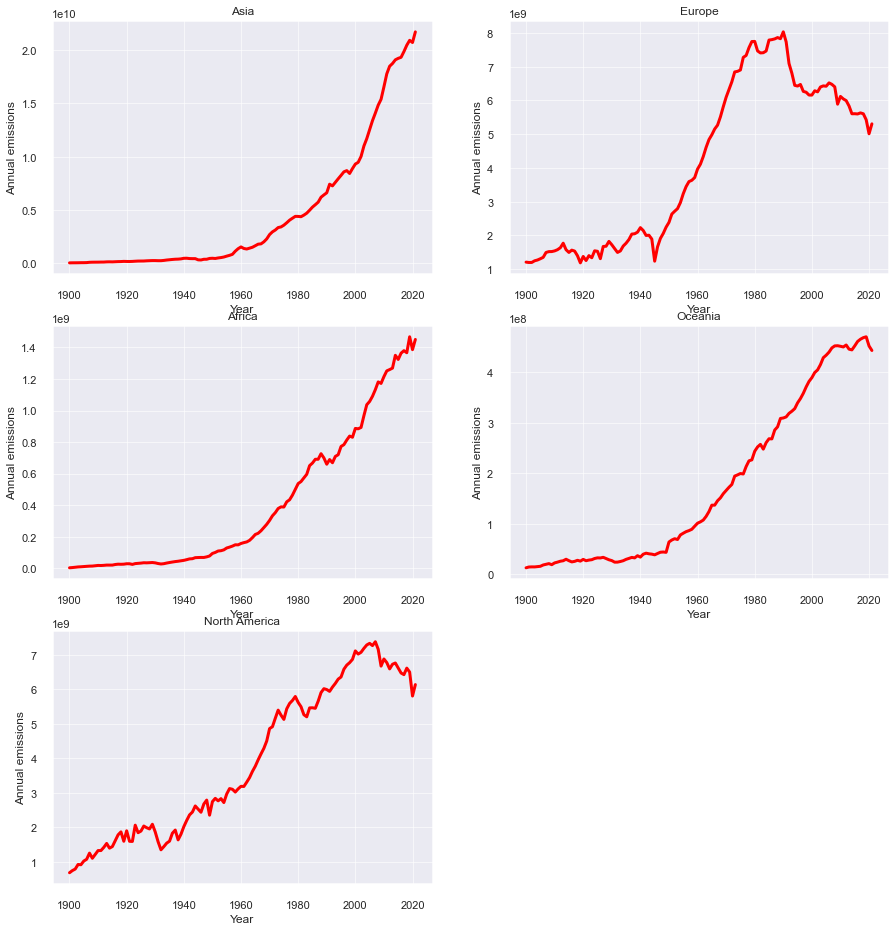

In [72]:
#Plotting line graphs for each continent

f, axes = plt.subplots(3, 2, figsize=(15, 15))
f.delaxes(ax = axes[2,1])


for continent, ax in zip(continents, axes.flatten()[:5]):
   
    sns.lineplot(data=continent_data[(continent_data['Year']>=1900) &(continent_data['Entity']==continent)],
                                         x='Year',
                                         y='Annual emissions',
                                         ax=ax, 
                                         color='r').set(title= continent)
    plt.subplots_adjust(top=0.9, bottom=0.1)

In [75]:
#total emissions
total_emissions_by_continent=continent_data.groupby('Entity').agg(Total_emissions=('Annual emissions', 'sum')).reset_index()
total_emissions_by_continent=total_emissions_by_continent.sort_values(by='Total_emissions', ascending=False)
total_emissions_by_continent

,Entity,Total_emissions
2,Asia,5.575965e+11
3,Europe,5.372442e+11
4,North America,4.842147e+11
0,Africa,4.913368e+10
6,South America,4.426754e+10
5,Oceania,2.136166e+10
1,Antarctica,1.538880e+05


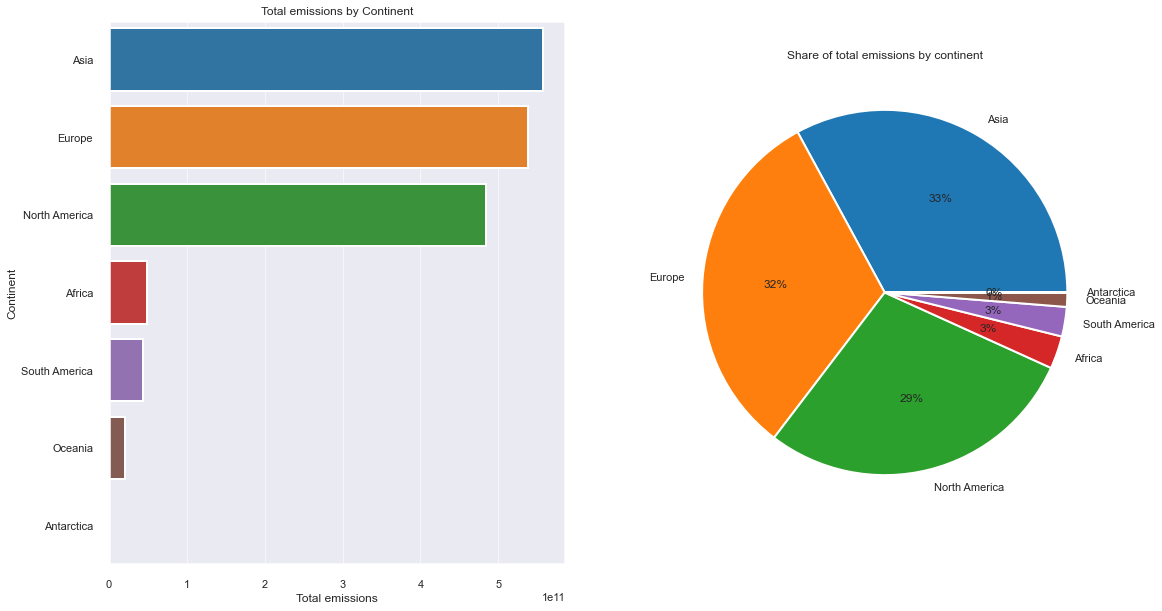

In [89]:
#plotting
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))
sns.barplot(data=total_emissions_by_continent, x='Total_emissions', y='Entity', ax=ax1)
ax1.set(title="Total emissions by Continent", xlabel='Total emissions', ylabel='Continent')

ax2.pie(total_emissions_by_continent.Total_emissions, labels=total_emissions_by_continent.Entity, 
        autopct='%.0f%%')
ax2.set_title('Share of total emissions by continent')

plt.show()

- North America and Europe have traditionally had the highest CO2 emissions, due to their historical role as major industrial powers and their high levels of energy consumption. These two continents have been responsible for more than half of the world's CO2 emissions since the industrial revolution.

- Asia, particularly China, has also had a significant impact on global emissions in recent years. China has been the largest CO2 emitter since 2006, due to its rapidly growing economy and its heavy reliance on coal as an energy source.

- Africa and South America have had the lowest emissions over the same period, due to their relatively low levels of industrialization and energy consumption. However, emissions from these continents have been increasing in recent years, driven by population growth and economic development.

- Oceania and Antarctica are the least emitters of CO2 among the continents.

- It's worth noting that these emissions are not necessarily proportional to the size of the continent or the population, the level of economic development, the energy mix and the industrialization level are the main factors that drive the emissions.

### 2.3. Country Trends

In [90]:
#Extracting country data

country_data=emissions_data[~emissions_data['Continent'].isnull()]
country_data.head()

,Entity,Code,Year,Annual emissions,Population,GDP,Continent,Emissions_per_capita,GDP_per_capita
0,Afghanistan,AFG,1750,0.0,2802568.0,NaN,Asia,0.0,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,Asia,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,Asia,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,Asia,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,Asia,NaN,NaN


In [91]:
#Getting top ten countries in terms of emissions
total__emissions_by_country=country_data.groupby('Entity').agg(Total_emissions=('Annual emissions', 'sum')).reset_index()
total__emissions_by_country.sort_values(by='Total_emissions',ascending=False).head(10)

,Entity,Total_emissions
220,United States,4.219069e+11
42,China,2.493528e+11
171,Russia,1.175476e+11
78,Germany,9.329050e+10
219,United Kingdom,7.850872e+10
103,Japan,6.671108e+10
94,India,5.710539e+10
72,France,3.910576e+10
37,Canada,3.411540e+10
217,Ukraine,3.078473e+10


In [94]:
total_emissions_by_country_top_ten=total__emissions_by_country.sort_values(by='Total_emissions',ascending=False).head(10)
total_emissions_by_country_top_ten

,Entity,Total_emissions
220,United States,4.219069e+11
42,China,2.493528e+11
171,Russia,1.175476e+11
78,Germany,9.329050e+10
219,United Kingdom,7.850872e+10
103,Japan,6.671108e+10
94,India,5.710539e+10
72,France,3.910576e+10
37,Canada,3.411540e+10
217,Ukraine,3.078473e+10


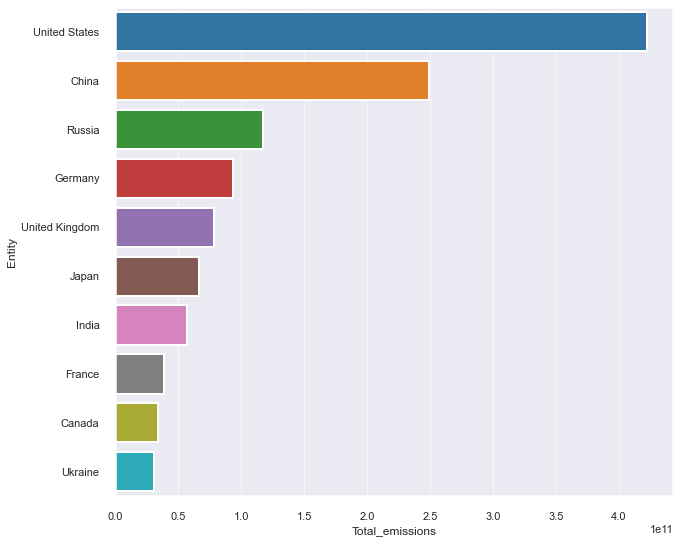

In [97]:
#plotting
plt.figure(figsize=(10,9))
sns.barplot(data=total_emissions_by_country_top_ten, x='Total_emissions', y='Entity')
plt.show()

#### Comparison Circles

In [120]:
import circlify

In [121]:
circles = circlify.circlify(total_emissions_by_country_top_ten.Total_emissions.tolist(), 
                            show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
circles.reverse()

In [122]:
pal_ = list(sns.color_palette(palette='plasma_r',
                              n_colors=len(total_emissions_by_country_top_ten.Entity)).as_hex())

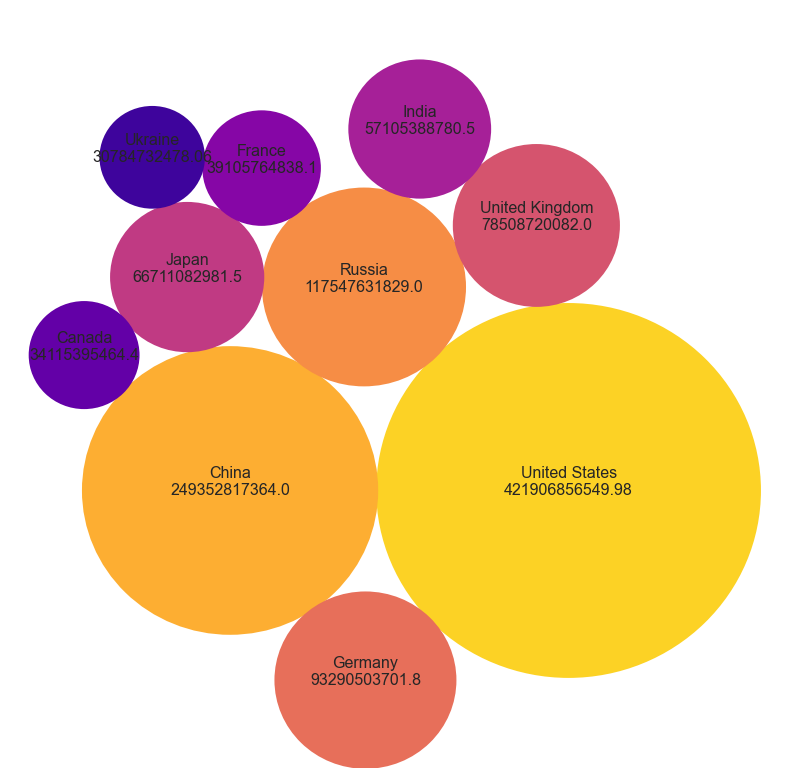

In [123]:
#create a labels list for each bubble 
label = [i+'<br>'+str(j)+'<br>' for i,j in zip(total_emissions_by_country_top_ten.Entity,
                                                  total_emissions_by_country_top_ten.Total_emissions          )
                                                            ]
fig, ax = plt.subplots(figsize=(14,14), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# print circles
for circle, note, color in zip(circles, label, pal_):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=1, color = color))
    plt.annotate(note.replace('<br>','\n'), (x,y), size=16, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

#### Area plots

In [ ]:
#Top five countries
total_emissions_by_country_top_five=total__emissions_by_country.sort_values(by='Total_emissions',ascending=False).head(5)

#extracting the list of top five countries
top_five_countries=total_emissions_by_country_top_five['Entity'].to_list()
print(top_five_countries)

In [109]:
#A function to filter out  data by  entity
def entity_filter(entity):
    entity_data=emissions_data[emissions_data['Entity']==entity]['Annual emissions'].reset_index(drop=True)
    return entity_data

In [110]:
#Creating a dictionary for the top_five countries
top_five_countries_emissions={}
for entity in top_five_countries:
    top_five_countries_emissions[entity]=entity_filter(entity)
    

In [112]:
#Adding the years column
top_five_countries_emissions['Year']=emissions_data['Year'].unique()

In [113]:
#creating a dataframe
top_five_countries_emissions=pd.DataFrame(top_five_countries_emissions)
top_five_countries_emissions.head()

,United States,China,Russia,Germany,United Kingdom,Year
0,0.0,0.0,0.0,0.0,9350528.0,1750
1,0.0,0.0,0.0,0.0,9350528.0,1751
2,0.0,0.0,0.0,0.0,9354192.0,1752
3,0.0,0.0,0.0,0.0,9354192.0,1753
4,0.0,0.0,0.0,0.0,9357856.0,1754


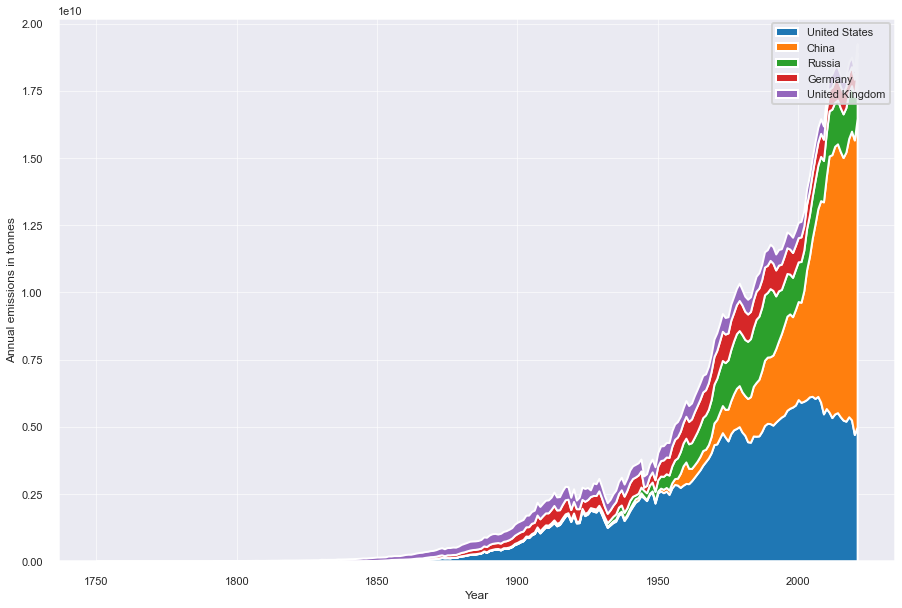

In [116]:
#Creating an area plot
plt.figure(figsize=(15,10))
plt.stackplot(top_five_countries_emissions.Year, top_five_countries_emissions['United States'], 
              top_five_countries_emissions['China'],
             top_five_countries_emissions['Russia'],
             top_five_countries_emissions['Germany'],
             top_five_countries_emissions['United Kingdom'],
             labels=top_five_countries)

plt.ylabel('Annual emissions in tonnes')
plt.xlabel('Year')
plt.legend()
plt.show()


In [100]:
#Adding a new country category
country_data['comparision_cat']=country_data['Entity'].apply(lambda x: x if  x in(top_five_countries) else 'Other Countries')
country_data.head()

,Entity,Code,Year,Annual emissions,Population,GDP,Continent,Emissions_per_capita,GDP_per_capita,comparision_cat
0,Afghanistan,AFG,1750,0.0,2802568.0,NaN,Asia,0.0,NaN,Other Countries
1,Afghanistan,AFG,1751,0.0,NaN,NaN,Asia,NaN,NaN,Other Countries
2,Afghanistan,AFG,1752,0.0,NaN,NaN,Asia,NaN,NaN,Other Countries
3,Afghanistan,AFG,1753,0.0,NaN,NaN,Asia,NaN,NaN,Other Countries
4,Afghanistan,AFG,1754,0.0,NaN,NaN,Asia,NaN,NaN,Other Countries


In [103]:
#creating a new grouped dataframe
total_emissions_by_country2=country_data.groupby('comparision_cat').agg(total_emissions=('Annual emissions','sum')).reset_index()
total_emissions_by_country2.head()


,comparision_cat,total_emissions
0,China,2.493528e+11
1,Germany,9.329050e+10
2,Other Countries,7.332119e+11
3,Russia,1.175476e+11
4,United Kingdom,7.850872e+10


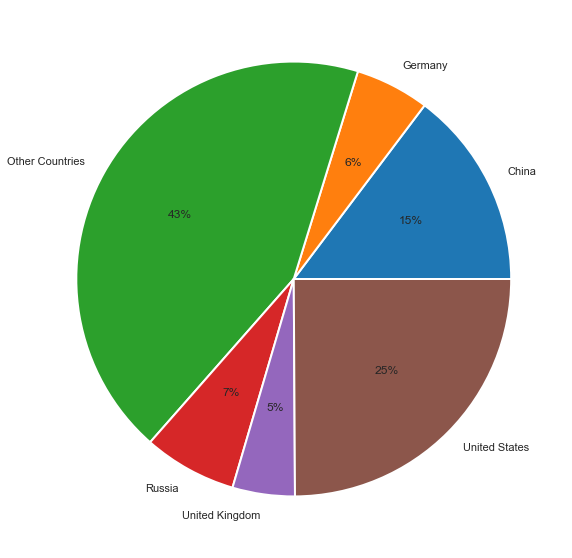

In [105]:
#Plotting a chart
plt.figure(figsize=(10,10))
plt.pie(total_emissions_by_country2.total_emissions, labels=total_emissions_by_country2.comparision_cat, 
        autopct='%.0f%%')

plt.show()

#### Top five countries by continent

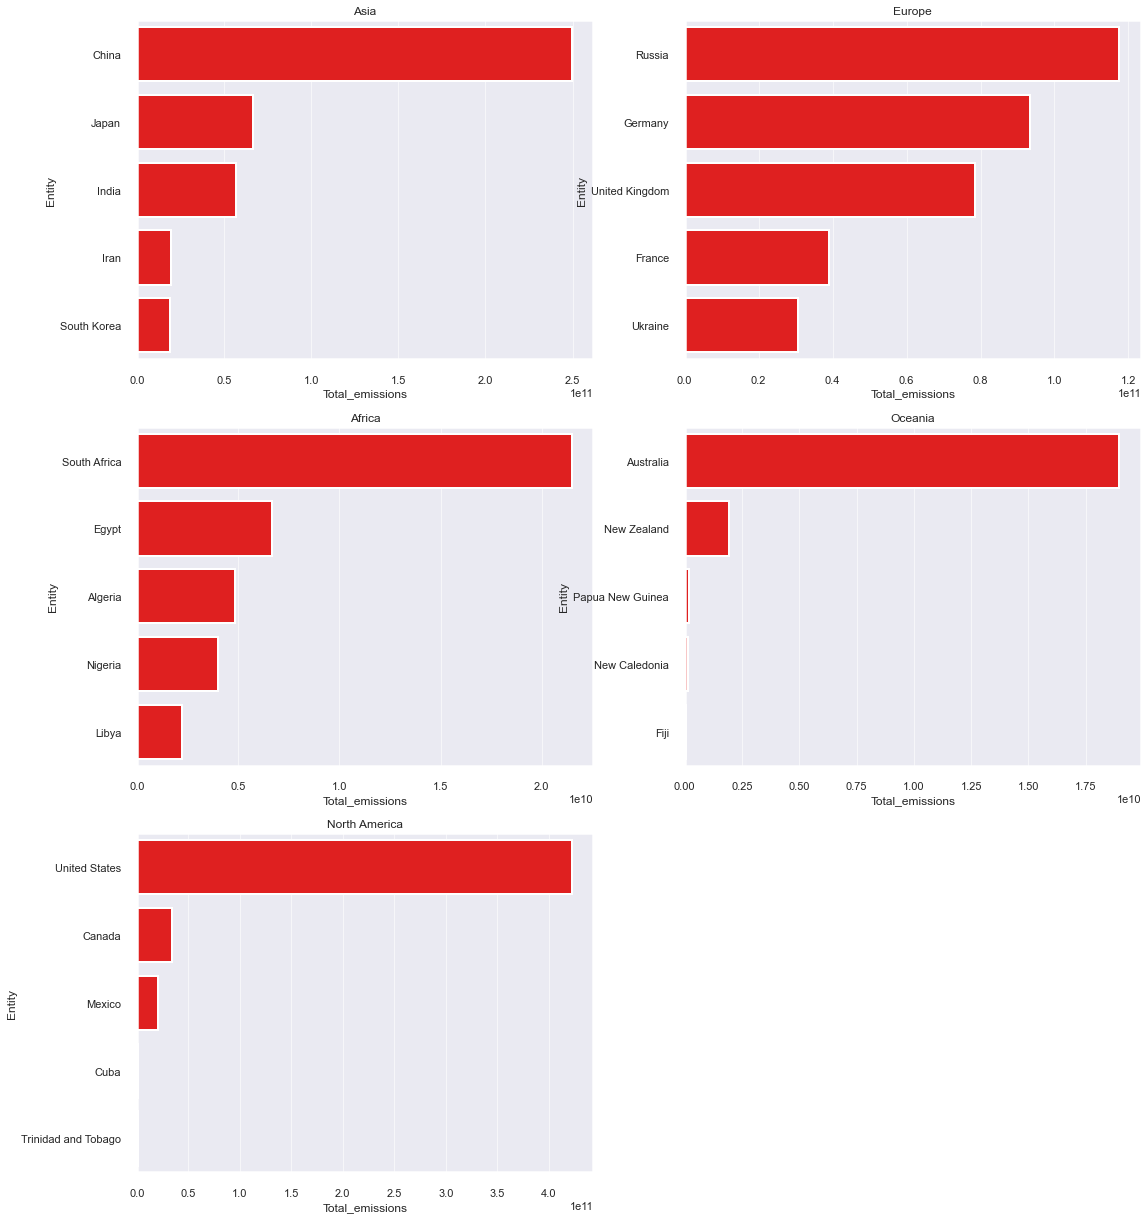

In [127]:
f, axes = plt.subplots(3, 2, figsize=(18, 20))
f.delaxes(ax = axes[2,1])


for continent, ax in zip(continents, axes.flatten()[:5]):
    emissions_data_by_continent=country_data[country_data['Continent']==continent].groupby('Entity').agg(Total_emissions=('Annual emissions', 'sum'))\
    .reset_index().sort_values(by='Total_emissions', ascending=False).head(5)
   
    sns.barplot(data=emissions_data_by_continent,
                 x='Total_emissions',
                 y='Entity',
                 ax=ax, 
                 color='r').set(title= continent)
    plt.subplots_adjust(top=0.9, bottom=0.1)

-  The countries that have traditionally had the highest CO2 emissions are the United States, China, Russia, Germany and the UK. These countries have been responsible for a large portion of global CO2 emissions due to their large populations, high levels of industrialization, and heavy reliance on fossil fuels as an energy source. This five countries alone account for more than half of the total emissions according to the provided data

- In recent years, China has overtaken the United States as the largest CO2 emitter, driven by China's rapidly growing economy, high energy consumption, and heavy use of coal as an energy source. The United States remains one of the largest emitters, but it has seen a reduction in emissions in recent years due to the shift towards natural gas and renewables as energy sources.

## 3. Correlation Analysis